In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
from os.path import join as pjoin

sys.path.append('../../..')
import os 


os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/decon/decon_env/DecontextEmbeddings/helpers/embedding_evaluation/data/'

DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR

FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'category_pred')

from helpers.things_evaluation.evaluate import read_embeddings, evaluate as run_evaluation
from helpers.data import load_things_database, yield_static_data
from helpers.intersection import get_intersection_words
from helpers.plot import get_ax, set_style_and_font_size, model_prettify

set_style_and_font_size()

from sklearn.model_selection import cross_val_score
from sklearn import svm
import os 


In [23]:
things_df = load_things_database()
things_df = things_df.rename(columns={"Top-down Category (manual selection)": 'category', 'uniqueID': 'things_id'})[['category', 'things_id']]
things_df.set_index('things_id')

,category
things_id,
aardvark,animal
abacus,home decor
accordion,musical instrument
acorn,NaN
air_conditioner,electronic device
...,...
yoke,NaN
yolk,food
zebra,animal


In [24]:
drop_categories = ['bird', 'clothing accessory', 'dessert', 'drink', 'fruit', 'insect', 'vegetable']

In [25]:
things_df[~things_df['category'].isin(drop_categories)].groupby('category').count()

,things_id
category,
animal,113
"animal, bird",25
"animal, bird, food",2
"animal, food",20
"animal, insect",17
...,...
weapon,29
"weapon, kitchen tool, tool",3
"weapon, sports equipment",3


In [26]:

def evaluate_category_prediction(df):
    clf = svm.SVC(kernel='linear', C=1, random_state=42)
    X = df.drop(columns=['category', 'things_id', 'n_contexts'])
    y = df['category']
    scores = cross_val_score(clf, X, y, cv=5)
    return scores

In [27]:
def evalute(df):
    df = things_df.merge(df, on='things_id').dropna()
    df = df[~df['category'].isin(drop_categories)]
    
    scores = evaluate_category_prediction(df)
    score = scores.mean()
    return score


In [28]:
matching = 'word'
corpus_folder = 'wikidumps'

In [29]:
matching_words_things = get_intersection_words(1, matching=matching, corpus_folder=corpus_folder, folder='thinga')

('w2v', '/home/hhansen/decon/decon_env/data/thinga/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')
('glove', '/home/hhansen/decon/decon_env/data/thinga/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')
('deconf', '/home/hhansen/decon/decon_env/data/thinga/static/deconf/embeddings.txt', 'synset')
Number of words intersection: 1522


In [30]:
from collections import defaultdict

combs = {
    'bert-base': {
                '1': range(13), 
                'all': range(13)
            },
            'bert-large': {
                '1': range(25), 
                'all': range(25)
            },
            'gpt-2': {
                '1': range(13),
                'all': range(13)
            },
            'gpt-2-medium': {
                '1': range(25), 
                'all': range(25)
            },
             'sbert_bert': {
                '1': range(13), 
                'all': range(13)
            },
            'sbert_distill_roberta': {
                '1': range(7), 
                'all': range(7)
            }
}

result = defaultdict(lambda: defaultdict(list))
for model, context_mapping in combs.items():
    print(model)
    for n_context, layers in context_mapping.items():
        for layer in layers:
            path = f'{EMBEDDING_DATA_DIR}/thinga/{corpus_folder}/decontext/{model}/{layer}/{matching}/mean/{n_context}/decontext.txt'
            df = read_embeddings(path, matching, keep_n_contexts=True, matching_words=matching_words_things)
            score = evalute(df)
            result[model][n_context].append(score)

bert-base


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


bert-large


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


gpt-2


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


gpt-2-medium


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


sbert_bert


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


sbert_distill_roberta


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [32]:
static_results = {}

for model, embedding_path, static_matching in yield_static_data('thinga'):
    df = read_embeddings(embedding_path, static_matching, keep_n_contexts=True)
    score = evalute(df)
    static_results[model] = score

('w2v', '/home/hhansen/decon/decon_env/data/thinga/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


('glove', '/home/hhansen/decon/decon_env/data/thinga/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


('deconf', '/home/hhansen/decon/decon_env/data/thinga/static/deconf/embeddings.txt', 'synset')


/home/hhansen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


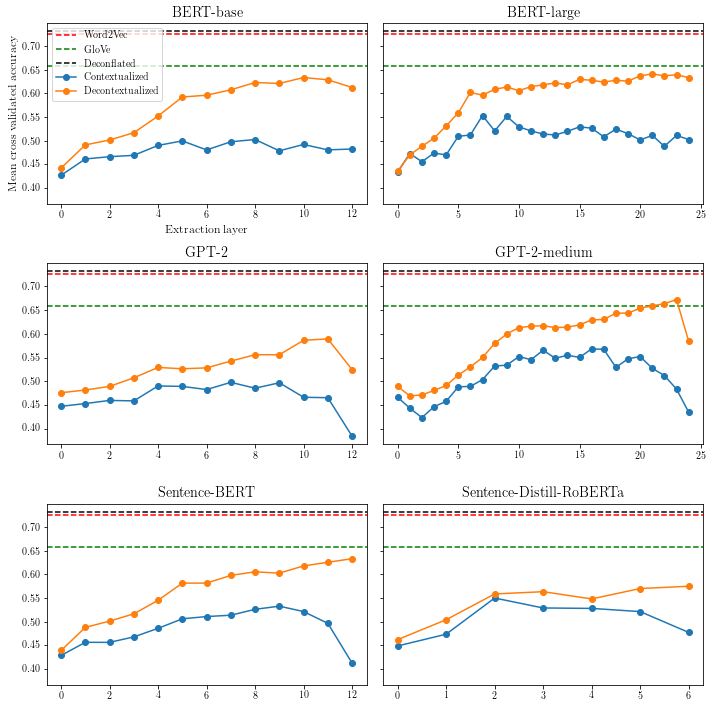

In [35]:
rows = []
fig, axes = plt.subplots(3,2, figsize=(10,10), sharey=True)

for i, model in enumerate(result):
    ax = get_ax(axes, i)
    
    ax.axhline(y=static_results['w2v'], linestyle='--', label='Word2Vec', c='red')
    ax.axhline(y=static_results['glove'], linestyle='--', label='GloVe', c='green')
    ax.axhline(y=static_results['deconf'], linestyle='--', label='Deconflated', c='black')

    context_mapping = result[model]
    ax.set_title(f'{model_prettify(model)}')
    for n_context, scores in context_mapping.items():
        layers = combs[model][n_context]
        label = 'Contextualized' if n_context == '1' else 'Decontextualized'
        ax.plot(layers, scores, marker='o', label=label)

axes[0][0].legend()
axes[0][0].set_ylabel('Mean cross validated accuracy')
axes[0][0].set_xlabel('Extraction layer')
plt.tight_layout()
plt.savefig(pjoin(FIGURE_OUTPUT_DIR, 'category_prediction.pdf'), bbox_inches='tight')
